In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [74]:
#INT is the contact infromation for INTERACTIONS
INT=pd.read_csv('C:/Users/mjc341/Desktop/UMAN 1507 Monthly INQ summary Report/Interactions.Contacts.csv',skipfooter=5,encoding='latin-1',engine ='python')


In [75]:
#CON is the CONTACT TERM information
CON=pd.read_csv('C:/Users/mjc341/Desktop/UMAN 1507 Monthly INQ summary Report/Interactions.Opportunity.Term.csv',skipfooter=5,encoding='latin-1',engine ='python')

In [76]:
len(INT)

1476708

In [77]:
len(CON)

818555

In [78]:
INT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1476708 entries, 0 to 1476707
Data columns (total 23 columns):
Contact: Contact ID (18-digit)      1476708 non-null object
Interaction: Interaction Name       1476708 non-null object
Admit Type                          1476708 non-null object
Contact: First Name                 1476701 non-null object
Contact: Middle Name                902513 non-null object
Contact: Last Name                  1476708 non-null object
Contact: Ethnic Group               472134 non-null object
Contact: Ethnicity                  1207596 non-null object
Contact: Gender                     1374958 non-null object
Term                                1470331 non-null object
Lead Source                         1476550 non-null object
Interaction: Created Date           1476708 non-null object
Contact: Mailing Street             1441085 non-null object
Contact: Mailing City               1450770 non-null object
Contact: Mailing State/Province     1394534 non-n

In [79]:
INT.columns

Index(['Contact: Contact ID (18-digit)', 'Interaction: Interaction Name',
       'Admit Type', 'Contact: First Name', 'Contact: Middle Name',
       'Contact: Last Name', 'Contact: Ethnic Group', 'Contact: Ethnicity',
       'Contact: Gender', 'Term', 'Lead Source', 'Interaction: Created Date',
       'Contact: Mailing Street', 'Contact: Mailing City',
       'Contact: Mailing State/Province', 'Contact: Mailing Zip/Postal Code',
       'Contact: Mailing Country', 'Contact: Other City',
       'Contact: Other State/Province', 'Contact: Other Zip/Postal Code',
       'Contact: Other Country', 'Contact: Market Segment Code',
       'Contact: Market Segment'],
      dtype='object')

In [80]:
CON.columns

Index(['Contact ID (18-digit)', 'Full Name', 'Opportunity Name',
       'Term: Term Name', 'Opportunity Record Type', 'Inquiry', 'Inquiry Date',
       'Opportunity ID (18-digit)', 'Empl ID', 'Application Number'],
      dtype='object')

In [81]:
CON.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818555 entries, 0 to 818554
Data columns (total 10 columns):
Contact ID (18-digit)        818553 non-null object
Full Name                    818553 non-null object
Opportunity Name             818553 non-null object
Term: Term Name              818109 non-null object
Opportunity Record Type      818553 non-null object
Inquiry                      818553 non-null float64
Inquiry Date                 714291 non-null object
Opportunity ID (18-digit)    818553 non-null object
Empl ID                      218979 non-null float64
Application Number           208095 non-null float64
dtypes: float64(3), object(7)
memory usage: 62.5+ MB


In [82]:
CON = CON.drop(columns =['Full Name',])

In [83]:
INT = INT.drop(columns= ['Contact: First Name', 'Contact: Middle Name',
       'Contact: Last Name'])

In [84]:
#changed the name of columns 
INT = INT.rename(columns ={'Contact: Contact ID (18-digit)':'Contact_ID','Interaction: Interaction Name':'Int_Name',
       'Admit Type':'Admit_Type','Contact: Ethnic Group': 'Ethnic_Group', 'Contact: Ethnicity':'Ethnicity',
       'Contact: Gender':'Gender', 'Term':'Term', 'Lead Source':'Lead_Source', 'Interaction: Created Date':'Create_Date',
       'Contact: Mailing Street':'Mailing_Street', 'Contact: Mailing City':'Mailing_City',
       'Contact: Mailing State/Province':'Mailing_State', 'Contact: Mailing Zip/Postal Code':'Mailing_Postal',
       'Contact: Mailing Country':'Mailing_Country', 'Contact: Other City':'Other_City',
       'Contact: Other State/Province':'Other_State', 'Contact: Other Zip/Postal Code':'Other_Postal',
       'Contact: Other Country':'Mailing_Country', 'Contact: Market Segment Code':'Market_Segment_Code',
       'Contact: Market Segment':'Market_Segment'},inplace =False)

In [86]:
#changed the name of columns
CON = CON.rename(columns={  'Contact ID (18-digit)':'Contact_ID', 'Opportunity Name':'OppName', 
       'Term: Term Name':'Term', 'Opportunity Record Type':'Record_Type', 'Inquiry':'Inquiry', 'Inquiry Date':'Inquiry_Date',
       'Opportunity ID (18-digit)':'Opp_ID', 'Empl ID':'EMPL', 'Application Number':'App_Number'})

In [87]:
INT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1476708 entries, 0 to 1476707
Data columns (total 20 columns):
Contact_ID             1476708 non-null object
Int_Name               1476708 non-null object
Admit_Type             1476708 non-null object
Ethnic_Group           472134 non-null object
Ethnicity              1207596 non-null object
Gender                 1374958 non-null object
Term                   1470331 non-null object
Lead_Source            1476550 non-null object
Create_Date            1476708 non-null object
Mailing_Street         1441085 non-null object
Mailing_City           1450770 non-null object
Mailing_State          1394534 non-null object
Mailing_Postal         1428272 non-null object
Mailing_Country        1440852 non-null object
Other_City             560780 non-null object
Other_State            511300 non-null object
Other_Postal           552667 non-null object
Mailing_Country        560769 non-null object
Market_Segment_Code    1418614 non-null object

In [88]:
CON.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818555 entries, 0 to 818554
Data columns (total 9 columns):
Contact_ID      818553 non-null object
OppName         818553 non-null object
Term            818109 non-null object
Record_Type     818553 non-null object
Inquiry         818553 non-null float64
Inquiry_Date    714291 non-null object
Opp_ID          818553 non-null object
EMPL            218979 non-null float64
App_Number      208095 non-null float64
dtypes: float64(3), object(6)
memory usage: 56.2+ MB


In [70]:
INT.dtypes

Contact_ID             object
Int_Name               object
Admit_Type             object
Ethnic_Group           object
Ethnicity              object
Gender                 object
Term                   object
Lead_Source            object
Create_Date            object
Mailing_Street         object
Mailing_City           object
Mailing_State          object
Mailing_Postal         object
Mailing_Country        object
Other_City             object
Other_State            object
Other_Postal           object
Mailing_Country        object
Market_Segment_Code    object
Market_Segment         object
dtype: object

In [89]:
#Sort INT by Contact_ID and Interaction Name
INT = INT.sort_values(by = ['Contact_ID','Int_Name'])

In [90]:
#Sort CON by Contact_ID and Opportunity Name
CON = CON.sort_values(by = ['Contact_ID','OppName'])

In [91]:
#Dropping the duplicates to then merge later
CON=CON.drop_duplicates(['Contact_ID'], keep='first')

In [93]:
""" f,ax =plt.subplots(figsize = (10,8))
sns.countplot(x = 'Lead_Source', data =INT,color = 'powderblue')
plt.xticks(rotation = 90)
plt.title('Count of Contact by Lead Source', loc = 'center', size = 20)   """

" f,ax =plt.subplots(figsize = (10,8))\nsns.countplot(x = 'Lead_Source', data =INT,color = 'powderblue')\nplt.xticks(rotation = 90)\nplt.title('Count of Contact by Lead Source', loc = 'center', size = 20)   "

In [95]:
INT.head(1)

,Contact_ID,Int_Name,Admit_Type,Ethnic_Group,Ethnicity,Gender,Term,Lead_Source,Create_Date,Mailing_Street,Mailing_City,Mailing_State,Mailing_Postal,Mailing_Country,Other_City,Other_State,Other_Postal,Mailing_Country,Market_Segment_Code,Market_Segment
774326,0031500001d4Si8AAE,20160320-0100599,New Student,NaN,NaN,Female,Fall 2015,Purchased List,1/4/2013,12831 sw 43 dr,miami,FL,33175,United States,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
INT['Create_Date']= pd.to_datetime(INT.Create_Date)

In [97]:
INT.dtypes

Contact_ID                     object
Int_Name                       object
Admit_Type                     object
Ethnic_Group                   object
Ethnicity                      object
Gender                         object
Term                           object
Lead_Source                    object
Create_Date            datetime64[ns]
Mailing_Street                 object
Mailing_City                   object
Mailing_State                  object
Mailing_Postal                 object
Mailing_Country                object
Other_City                     object
Other_State                    object
Other_Postal                   object
Mailing_Country                object
Market_Segment_Code            object
Market_Segment                 object
dtype: object

In [98]:
INT['Create_Date'].min()

Timestamp('2001-08-06 00:00:00')

In [102]:
INT.Create_Date.dt.year.head(2)


774326    2013
774924    2015
Name: Create_Date, dtype: int64

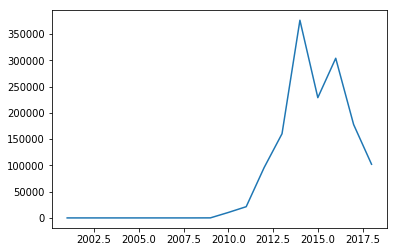

In [103]:
INT.Create_Date.dt.year.value_counts().sort_index().plot()

In [172]:
#INT.Create_Date.dt.year.value_counts()

In [104]:
INT2017 = INT.loc[(INT.Term == 'Fall 2017')]
len(INT2017)

213569

In [105]:
INT2017.head(1)

,Contact_ID,Int_Name,Admit_Type,Ethnic_Group,Ethnicity,Gender,Term,Lead_Source,Create_Date,Mailing_Street,Mailing_City,Mailing_State,Mailing_Postal,Mailing_Country,Other_City,Other_State,Other_Postal,Mailing_Country,Market_Segment_Code,Market_Segment
774924,0031500001d4Si8AAE,20160320-1020622,New Student,NaN,NaN,Female,Fall 2017,College Fair,2015-11-19,12831 sw 43 dr,miami,FL,33175,United States,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
INT2017.columns

Index(['Contact_ID', 'Int_Name', 'Admit_Type', 'Ethnic_Group', 'Ethnicity',
       'Gender', 'Term', 'Lead_Source', 'Create_Date', 'Mailing_Street',
       'Mailing_City', 'Mailing_State', 'Mailing_Postal', 'Mailing_Country',
       'Other_City', 'Other_State', 'Other_Postal', 'Mailing_Country',
       'Market_Segment_Code', 'Market_Segment'],
      dtype='object')

In [107]:
tsprior = pd.Timestamp('1/1/2016', tz='US/Central')

In [108]:
tsprior



Timestamp('2016-01-01 00:00:00-0600', tz='US/Central')

In [109]:
B4JAN16 = INT2017.loc[INT2017.Create_Date <= tsprior,:]

In [110]:
len(B4JAN16)

58733

In [41]:
#begin dtDEV branch

In [111]:
B4JAN16.columns


Index(['Contact_ID', 'Int_Name', 'Admit_Type', 'Ethnic_Group', 'Ethnicity',
       'Gender', 'Term', 'Lead_Source', 'Create_Date', 'Mailing_Street',
       'Mailing_City', 'Mailing_State', 'Mailing_Postal', 'Mailing_Country',
       'Other_City', 'Other_State', 'Other_Postal', 'Mailing_Country',
       'Market_Segment_Code', 'Market_Segment'],
      dtype='object')

In [112]:
B4JAN16['Contact_ID'].value_counts().sum()

58733

In [113]:
B4JAN16.Create_Date.dt.month.value_counts().sort_index()

1     13918
2     14725
3      4662
4      1362
5      1827
6      2495
7       998
8      3330
9       831
10     6879
11     4265
12     3441
Name: Create_Date, dtype: int64

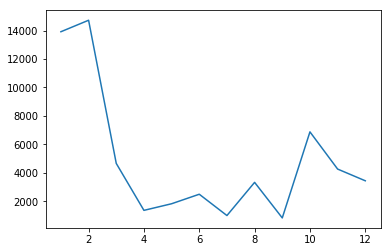

In [114]:
B4JAN16.Create_Date.dt.month.value_counts().sort_index().plot()

In [76]:
#Review diff have to create a df from B4JAN16 results then ad column CT1['Diff'] = CT1['count'].diff()

In [115]:
tsprior2 =pd.Timestamp ('1/1/2018')

In [116]:
tsprior2

Timestamp('2018-01-01 00:00:00')

In [117]:
INT2018 = INT.loc[(INT.Term == 'Fall 2018')]
#PriortoJan12017 = INT2018.loc[INT2017.Create_Date <= tsprior2,:]

In [118]:
len(INT2018)

178696

In [119]:
# M = Month end frq and MS = month start freq
rng = pd.date_range('2016 Jan 1 00:00', periods = 12, freq = 'MS')
rng2 = pd.date_range('2017 Jan 1 00:00', periods = 12, freq = 'MS')

In [120]:
rng

DatetimeIndex(['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [121]:
rng2

DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', freq='MS')